# Notebook for understanding the alpha distribution of the regression models

In [83]:
import os
import numpy as np
import pandas as pd
import nilearn
import glob
import nibabel as nib
import nistats
import scipy
import nibabel as nib
import nilearn
from nilearn.image import load_img, mean_img, index_img, threshold_img, math_img, smooth_img, new_img_like
from nilearn.input_data import NiftiMapsMasker, NiftiMasker, NiftiLabelsMasker, MultiNiftiMasker
from nilearn.regions import RegionExtractor
from nistats.second_level_model import SecondLevelModel
from nistats.thresholding import map_threshold
from nilearn import plotting
from nilearn import datasets
from scipy.stats import norm
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib

In [84]:
from logger import Logger
from utils import read_yaml, check_folder, fetch_masker, possible_subjects_id, get_subject_name

In [85]:
path = '/Users/alexpsq/Code/Parietal/data/maps'
language = 'english'

In [86]:
#PROJECT_PATH = f"/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/"
OUTPUT_PATH = f"/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/derivatives/fMRI/maps/{language}"
INPUT_PATH = f"/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/stimuli-representations/{language}"
FMRIDATA_PATH = f"/neurospin/unicog/protocols/IRMf/LePetitPrince_Pallier_2018/LePetitPrince/data/fMRI/{language}"
MASKER_PATH = f"/Users/alexpsq/Code/Parietal/data/global_masker_{language}"
PROJECT_PATH = f"/Users/alexpsq/Code/Parietal/data"

In [87]:
data = sorted(glob.glob(path+'/**/*alpha.nii.gz'))

In [88]:
logger = Logger(os.path.join(PROJECT_PATH, 'logs.txt'))

In [89]:
masker = fetch_masker(MASKER_PATH, language, FMRIDATA_PATH, INPUT_PATH, smoothing_fwhm=None, logger=logger)


In [90]:
imgs = [masker.transform(path_to_data) for path_to_data in data]

/Applications/anaconda3/envs/parietal/lib/python3.7/site-packages/nilearn/signal.py:163: UserWarning: Detrending of 3D signal has been requested but would lead to zero values. Skipping.
  warnings.warn('Detrending of 3D signal has been requested but '
/Applications/anaconda3/envs/parietal/lib/python3.7/site-packages/nilearn/signal.py:61: UserWarning: Standardization of 3D signal has been requested but would lead to zero values. Skipping.
  warnings.warn('Standardization of 3D signal has been requested but '


In [91]:
print('Number of images: {}'.format(len(imgs)))
print('Image dimensions: {}'.format(imgs[0].shape))

Number of images: 102
Image dimensions: (1, 26069)


In [92]:
def load_atlas(name='cort-prob-2mm'):
    atlas = datasets.fetch_atlas_harvard_oxford(name)
    labels = atlas['labels']
    maps = nilearn.image.load_img(atlas['maps'])
    return maps, labels

In [93]:
atlas_maps, labels = load_atlas() # load harvard-oxford atlas named'cort-prob-2mm'

	Looping through labeled masks...
Length data:  (494598,)


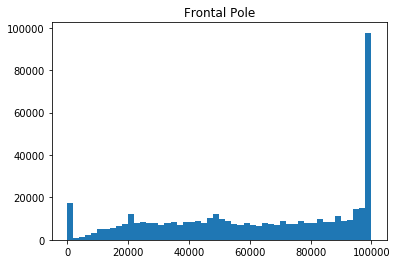

Length data:  (52581,)


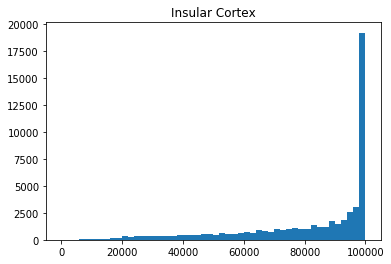

Length data:  (55845,)


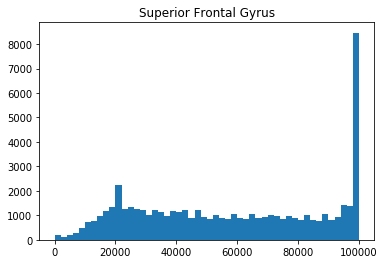

Length data:  (70533,)


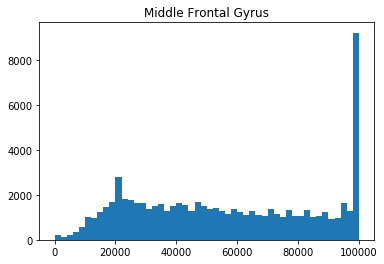

Length data:  (9588,)


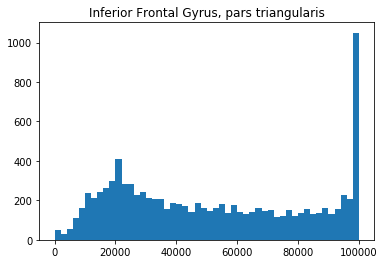

Length data:  (20043,)


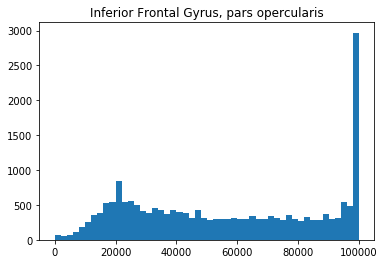

Length data:  (100929,)


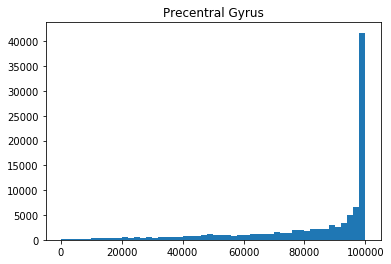

Length data:  (137751,)


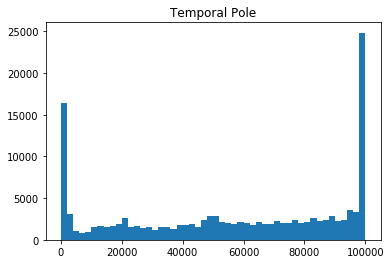

Length data:  (4437,)


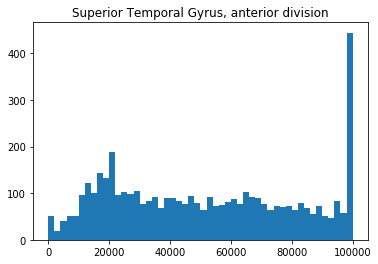

Length data:  (30243,)


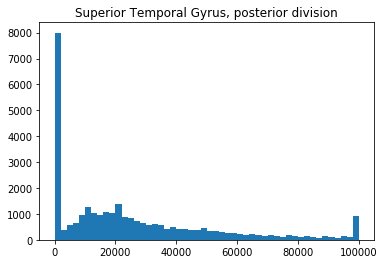

Length data:  (9945,)


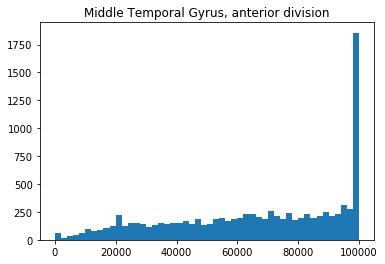

Length data:  (46563,)


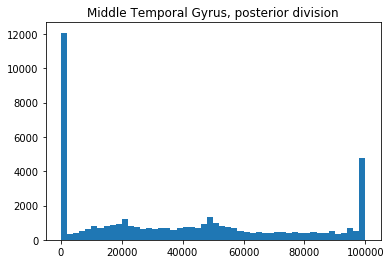

Length data:  (34119,)


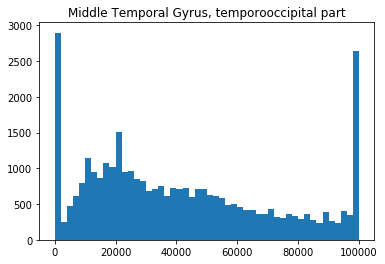

Length data:  (8619,)


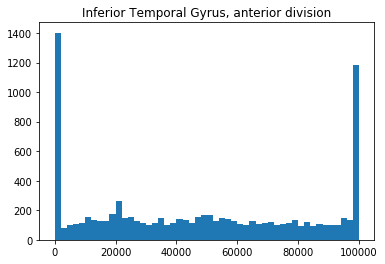

Length data:  (21063,)


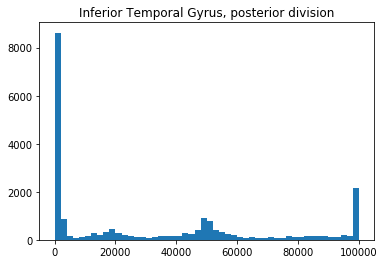

Length data:  (26112,)


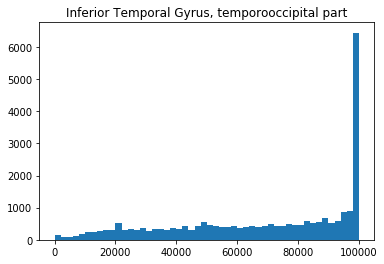

Length data:  (97359,)


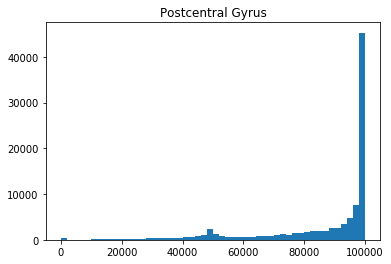

Length data:  (28713,)


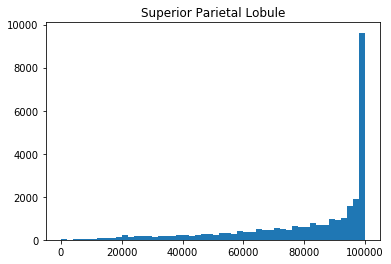

Length data:  (28356,)


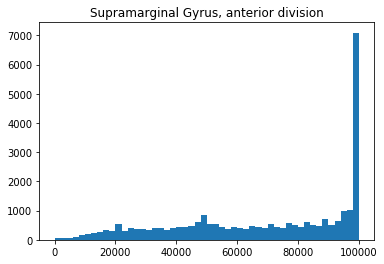

Length data:  (22287,)


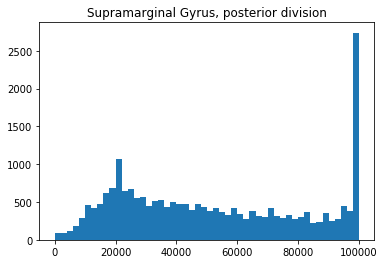

Length data:  (35955,)


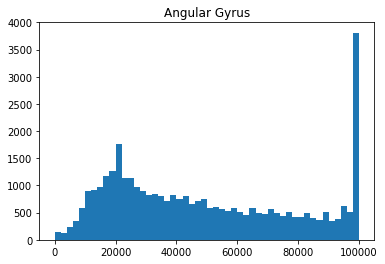

Length data:  (252399,)


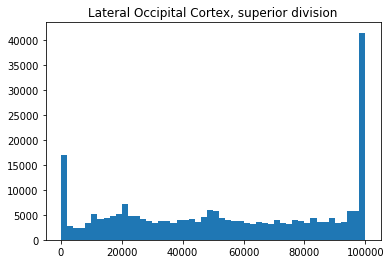

Length data:  (95778,)


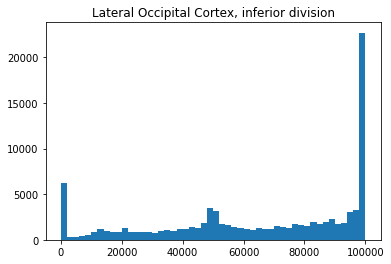

Length data:  (20400,)


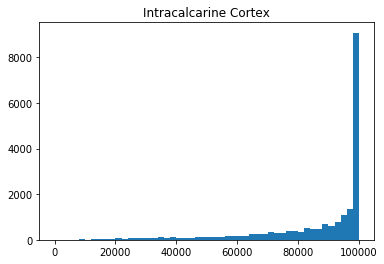

Length data:  (27948,)


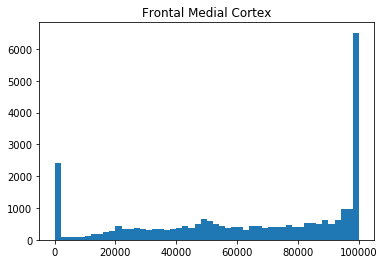

Length data:  (33150,)


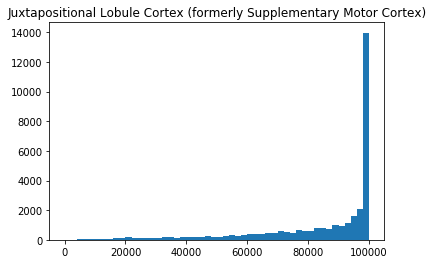

Length data:  (34884,)


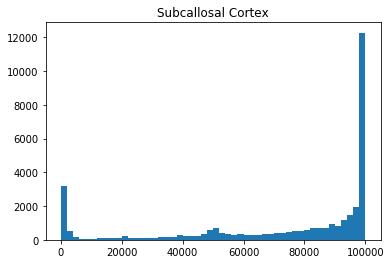

Length data:  (79152,)


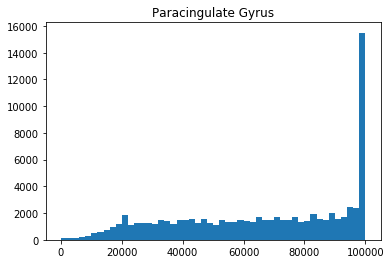

Length data:  (75837,)


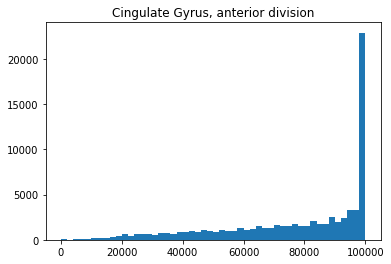

Length data:  (63903,)


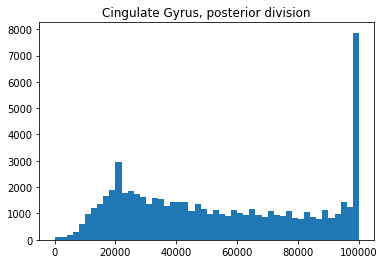

Length data:  (127755,)


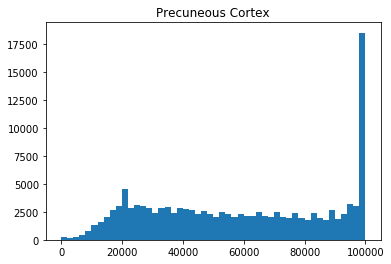

Length data:  (14841,)


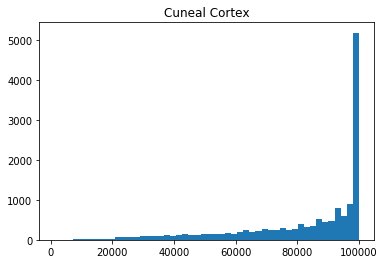

Length data:  (83181,)


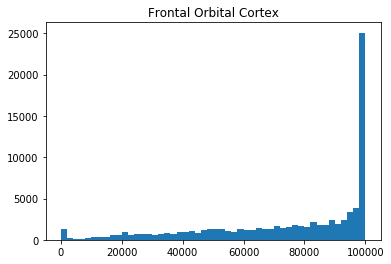

Length data:  (28560,)


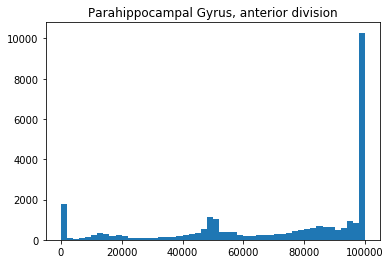

Length data:  (14025,)


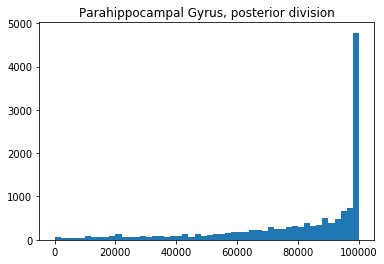

Length data:  (72828,)


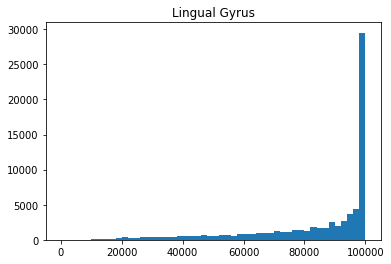

Length data:  (8568,)


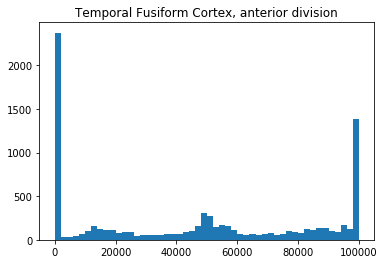

Length data:  (31161,)


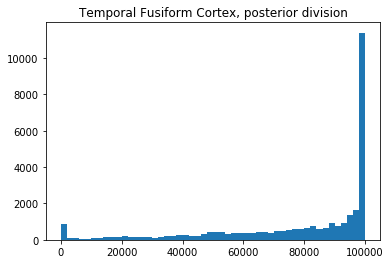

Length data:  (28713,)


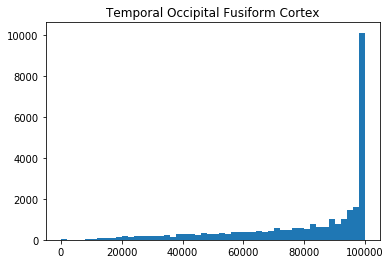

Length data:  (24429,)


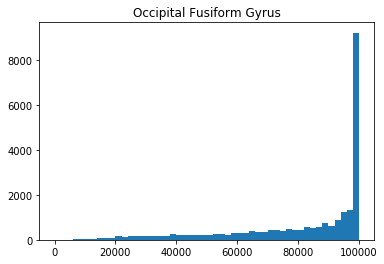

Length data:  (9333,)


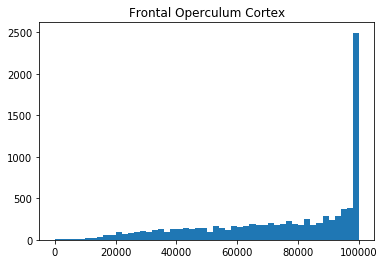

Length data:  (47226,)


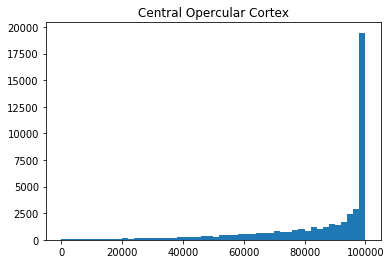

Length data:  (18360,)


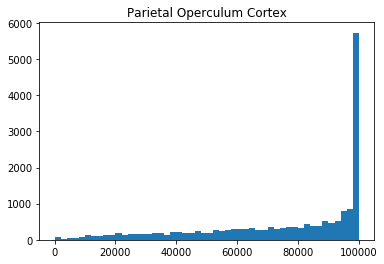

Length data:  (10251,)


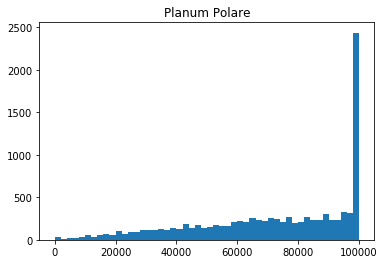

Length data:  (6375,)


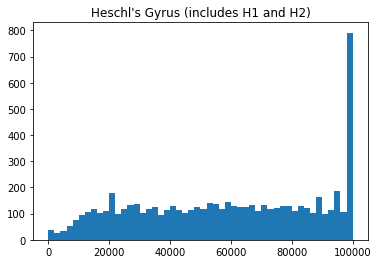

Length data:  (9129,)


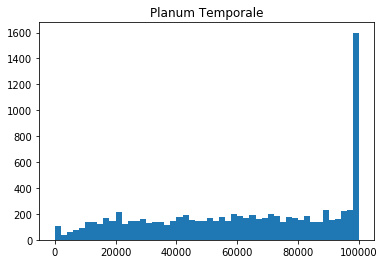

Length data:  (612,)


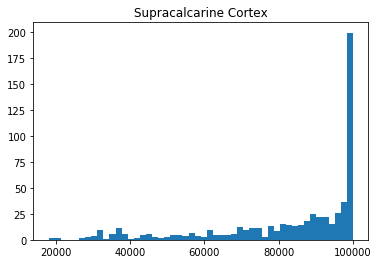

Length data:  (116535,)


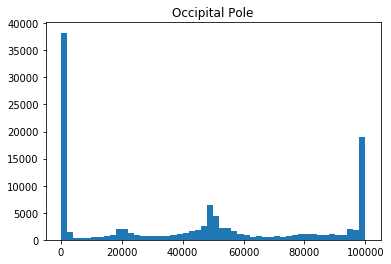

		-->Done


In [43]:
x_labels = labels[1:]

# extract data
print("\tLooping through labeled masks...")
for index_mask in range(len(x_labels)):
    mask = math_img('img > 50', img=index_img(atlas_maps, index_mask))  
    special_masker = NiftiMasker(mask_img=mask, memory='nilearn_cache', verbose=0)
    special_masker.fit()
    
    arrays = []
    for path_to_data in data:
        arrays.append(special_masker.transform(path_to_data).reshape(-1))
    distribution = np.hstack(arrays)
    print('Length data: ', distribution.shape)
    plt.hist(distribution[~np.isnan(distribution)], bins=50)
    plt.title(x_labels[index_mask])
    plt.show()
print("\t\t-->Done")


In [98]:
R2 = sorted(glob.glob(path+'/**/*R2.nii.gz'))

In [99]:
quantile=90

In [101]:
import warnings
warnings.simplefilter(action='ignore')

	Looping through labeled masks...
0.02905347975993585
Length data:  (247299,)


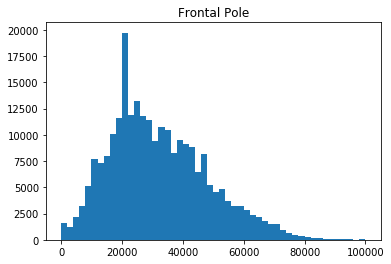

0.009651645213922241
Length data:  (26291,)


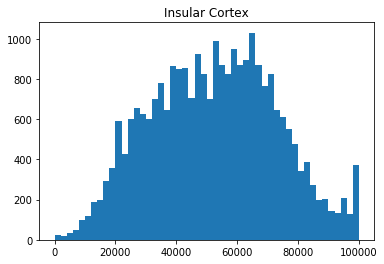

0.045397785840326964
Length data:  (27923,)


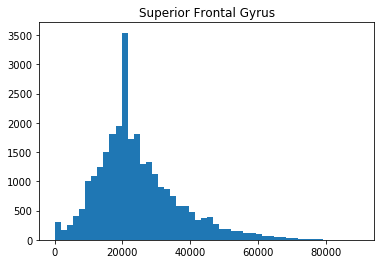

0.04129698844909865
Length data:  (35267,)


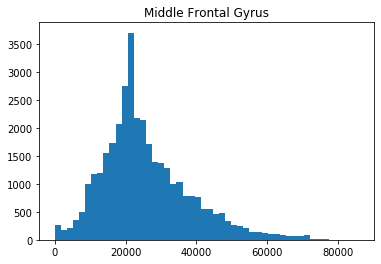

0.05011210255198259
Length data:  (4794,)


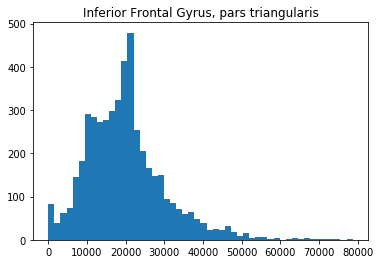

0.0428679593079023
Length data:  (10022,)


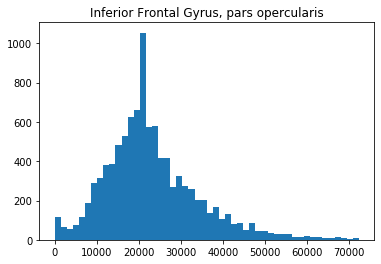

0.008002312423455919
Length data:  (50465,)


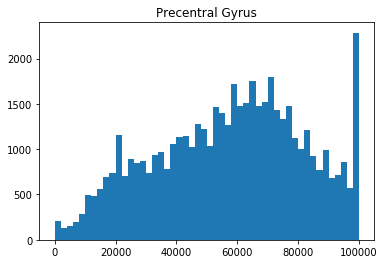

0.02834161159714975
Length data:  (68876,)


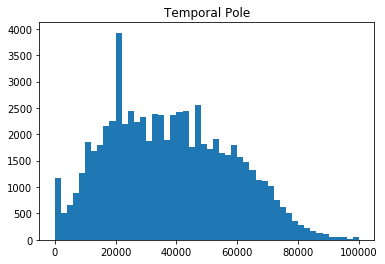

0.045427540364343336
Length data:  (2219,)


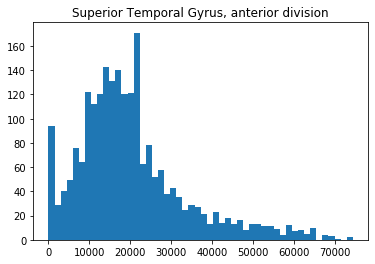

0.06057898412694673
Length data:  (15122,)


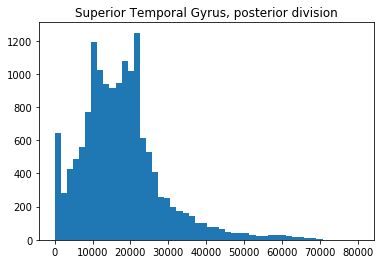

0.030536383515839073
Length data:  (4973,)


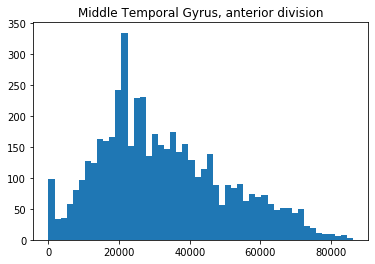

0.030953572822976505
Length data:  (23282,)


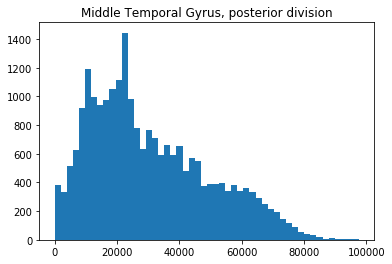

0.05077655272273586
Length data:  (17060,)


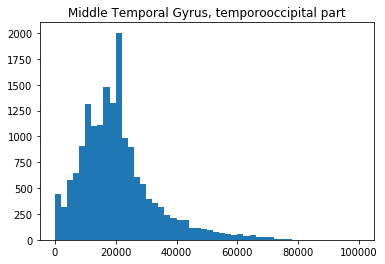

0.03610300161032092
Length data:  (4310,)


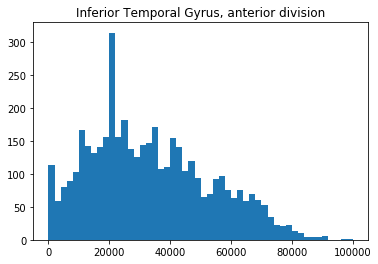

0.0014359380867931795
Length data:  (10532,)


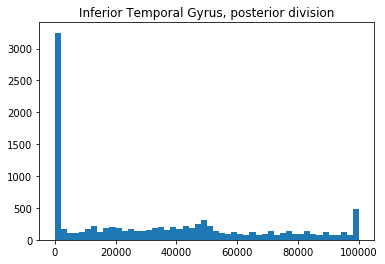

0.024721186358456798
Length data:  (13056,)


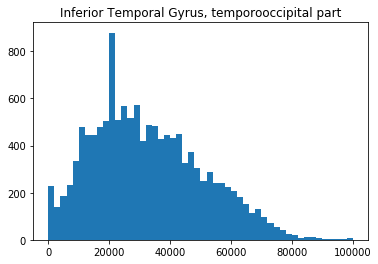

0.003573607644192748
Length data:  (48680,)


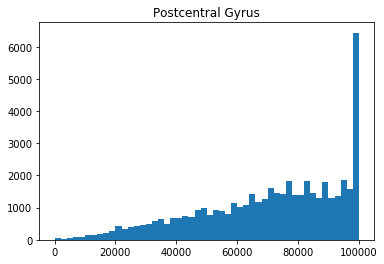

0.010077262740517087
Length data:  (14357,)


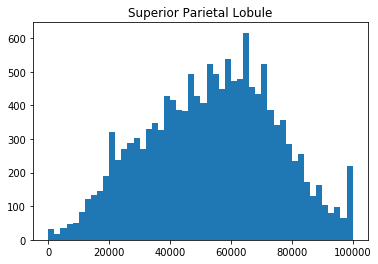

0.01895376616761843
Length data:  (14178,)


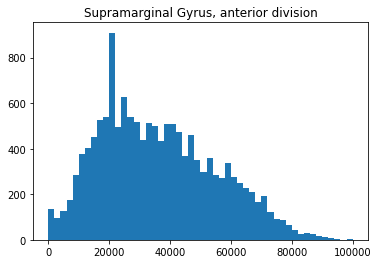

0.04368284049151728
Length data:  (11144,)


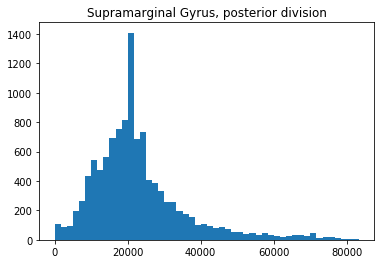

0.05319727010465825
Length data:  (17978,)


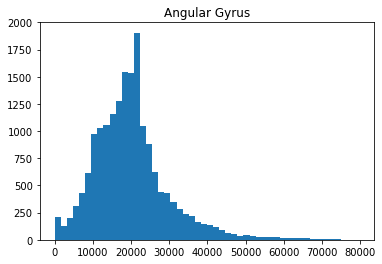

0.03546635707864292
Length data:  (126200,)


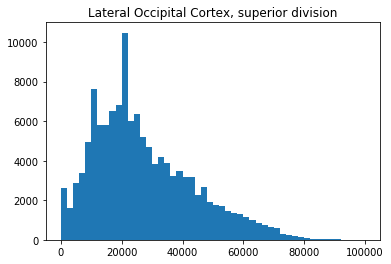

0.009307539433571446
Length data:  (47889,)


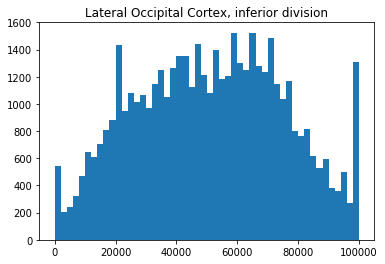

0.005255448067617344
Length data:  (10200,)


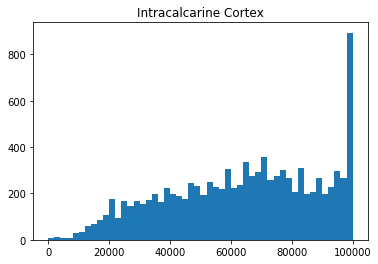

0.01630526192102838
Length data:  (13974,)


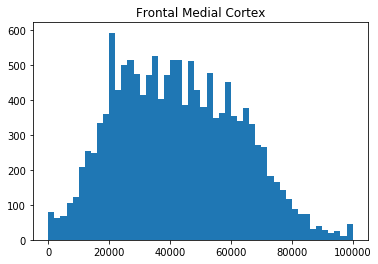

0.008628684528637043
Length data:  (16575,)


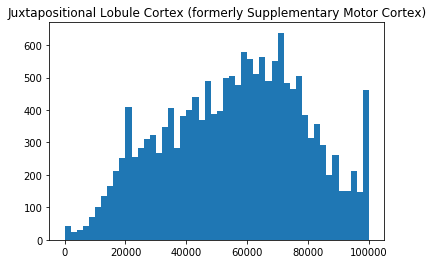

0.0023208634581637125
Length data:  (17442,)


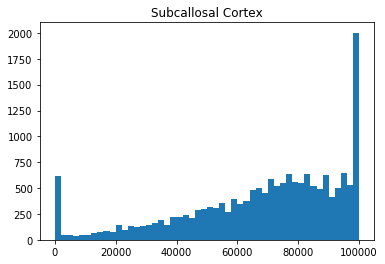

0.028641070068342503
Length data:  (39576,)


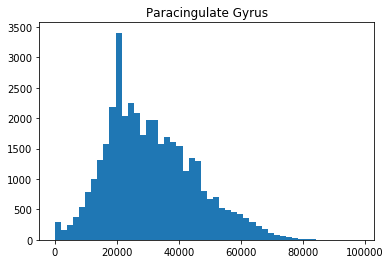

0.013931789336957347
Length data:  (37919,)


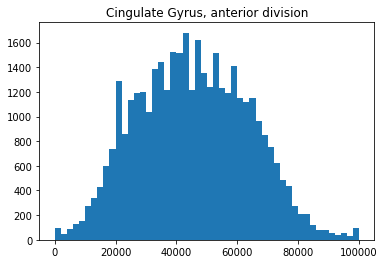

0.03798214776982936
Length data:  (31952,)


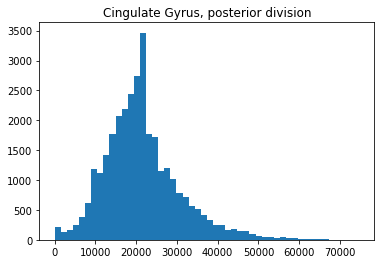

0.031221823059507242
Length data:  (63878,)


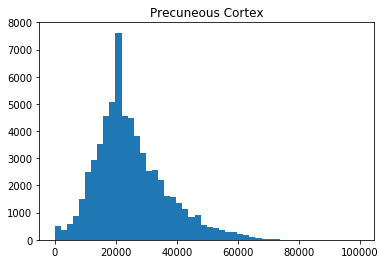

0.009021738269465604
Length data:  (7421,)


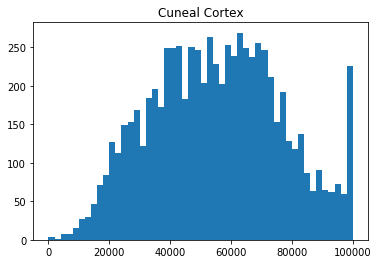

0.016834020740388887
Length data:  (41591,)


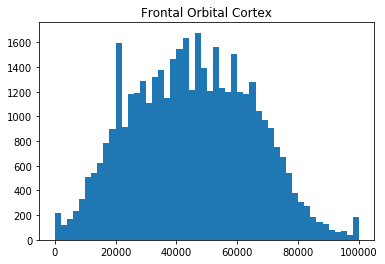

0.0015274163882448817
Length data:  (14280,)


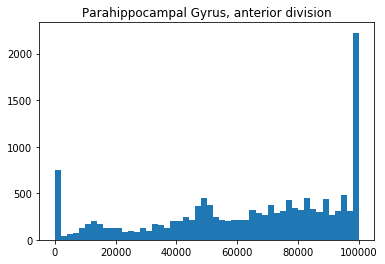

0.012432291116078919
Length data:  (7013,)


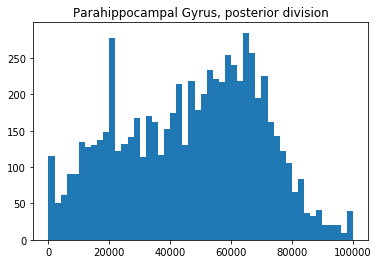

0.006900270103062557
Length data:  (36414,)


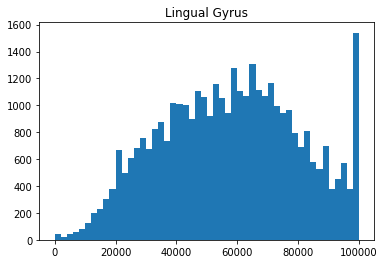

0.004571663784494173
Length data:  (4284,)


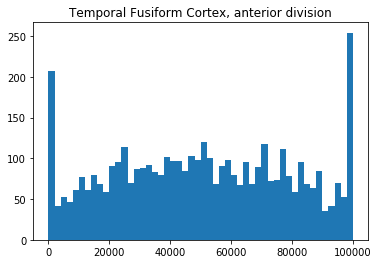

0.007352875178599164
Length data:  (15581,)


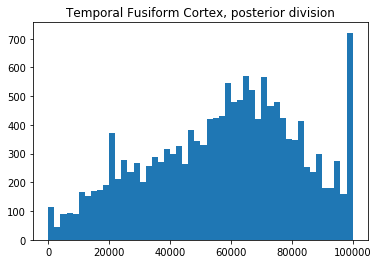

0.009618822035719935
Length data:  (14357,)


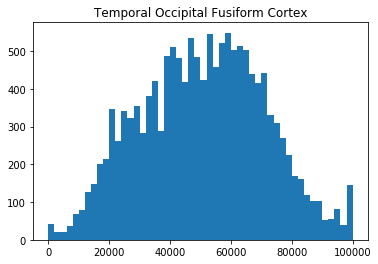

0.011821639571105354
Length data:  (12215,)


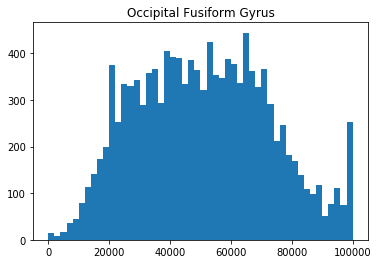

0.01670551767973448
Length data:  (4667,)


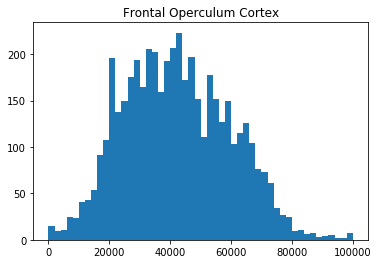

0.007655810882487907
Length data:  (23613,)


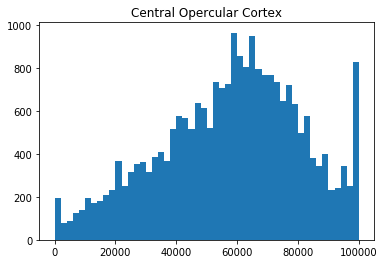

0.013742010878100258
Length data:  (9180,)


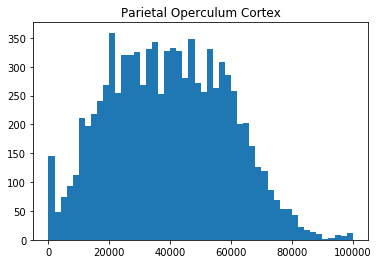

0.0158824253731565
Length data:  (5126,)


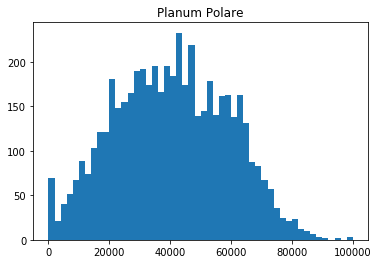

0.02197514815331449
Length data:  (3188,)


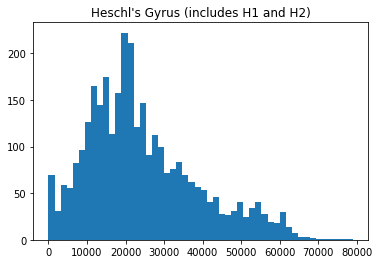

0.027715452689787354
Length data:  (4565,)


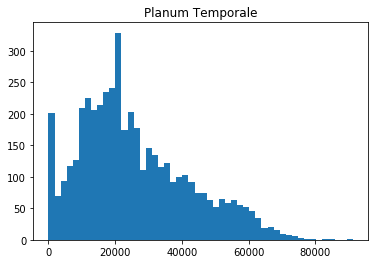

0.007671806289455595
Length data:  (306,)


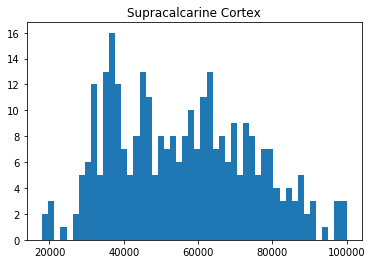

0.001942081489247117
Length data:  (58268,)


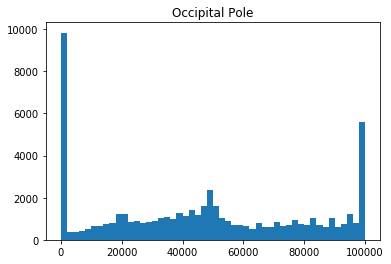

		-->Done


In [102]:
x_labels = labels[1:]

# extract data
print("\tLooping through labeled masks...")
for index_mask in range(len(x_labels)):
    mask = math_img('img > 50', img=index_img(atlas_maps, index_mask))  
    special_masker = NiftiMasker(mask_img=mask, memory='nilearn_cache', verbose=0)
    special_masker.fit()
    
    alpha_arrays = []
    R2_arrays = []
    for index, path_to_data in enumerate(data):
        alpha_arrays.append(special_masker.transform(path_to_data).reshape(-1))
        R2_arrays.append(special_masker.transform(R2[index]).reshape(-1))
    distribution_alpha = np.hstack(alpha_arrays)
    distribution_R2 = np.hstack(R2_arrays)
    print(np.percentile(distribution_R2, quantile))
    distribution_alpha = distribution_alpha[distribution_R2>np.percentile(distribution_R2, 75)]
    distribution_alpha = distribution_alpha[~np.isnan(distribution_alpha)]
    print('Length data: ', distribution_alpha.shape)
    plt.hist(distribution_alpha, bins=50)
    plt.title(x_labels[index_mask])
    plt.show()
print("\t\t-->Done")
